<a href="https://colab.research.google.com/github/WHU-Peter/COMP6248-Deep-Learning/blob/master/DL_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Execute this code block to install dependencies when running on colab
try:
    import torch
except:
    from os.path import exists
    from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
    platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
    cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
    accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

    !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.0.0-{platform}-linux_x86_64.whl torchvision

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


tensor([[-0.2090,  0.6173],
        [ 1.7662,  0.5017],
        [ 1.2601,  1.1556]], dtype=torch.float64) tensor([[ 1.5870,  0.8964],
        [-0.2226,  0.7613],
        [ 0.8673,  0.8783]], dtype=torch.float64)
tensor(0.1220, dtype=torch.float64)
tensor([[0.2441, 0.2589],
        [0.2216, 0.0572],
        [0.4618, 0.3373]], dtype=torch.float64, requires_grad=True) tensor([[ 19.0884, -17.2142],
        [ -0.4229,   2.3725],
        [ 11.3944,  -9.2106]], dtype=torch.float64, requires_grad=True)
tensor(0.1317, dtype=torch.float64, grad_fn=<MseLossBackward>)


Text(0.5, 1.0, 'Gradient by AD Framework')

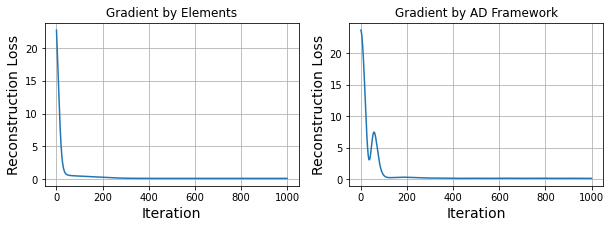

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
import torch.optim as optim

def sgdfactorise (A, rank, numepochs =1000, lr=0.01):

  U = torch.tensor(U_random)
  V = torch.tensor(V_random)

  error = np.zeros(numepochs)
  for n in range(numepochs):
    for r in range(A.shape[0]):
      for c in range(A.shape[1]):
        e = A[r][c] - U[r]@V[c].t()
        Urorigin = U[r]
        U[r] = U[r] + lr*e*V[c]
        V[c] = V[c] + lr*e*Urorigin
    error[n] = torch.nn.functional.mse_loss(torch.mm(U, V.t()).float(), A, reduction='sum')
  return U,V,error

def sgdfactorise_torch (A_tensor, rank, numepochs =1000, lr=0.0005):
  U_tensor = torch.tensor(U_random, requires_grad=True).double()
  V_tensor = torch.tensor(V_random, requires_grad=True).double()
  error = np.zeros(numepochs)
  for n in range(1000):
    L = torch.nn.functional.mse_loss(torch.mm(U_tensor, V_tensor.t()), A_tensor, reduction='sum')
    error[n] = L
    L.backward() 
    U_tensor.data = U_tensor.data - lr * U_tensor.grad
    V_tensor.data = V_tensor.data - lr * V_tensor.grad
    U_tensor.grad.fill_(0)
    U_tensor.grad.fill_(0)
  return U_tensor,V_tensor,error


Aarray = np.array ([0.3374,0.6005,0.1735,3.3359,0.0492,1.8374,2.9407,0.5301,2.2620]).reshape(3,3)
A = torch.from_numpy(Aarray)
rank = 2
U_random = np.random.rand(A.shape[0], rank)
V_random = np.random.rand(A.shape[1], rank)
A_tensor = torch.tensor(A, dtype=torch.double, requires_grad=True)
U1,V1,ERROR1 = sgdfactorise(A, rank)
print (U1,V1)
print (torch.nn.functional.mse_loss(A, U1@V1.t(),reduction='sum'))

U2,V2,ERROR2 = sgdfactorise_torch(A_tensor, rank)
print (U2,V2)
print (torch.nn.functional.mse_loss(A, U2@V2.t(),reduction='sum'))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
ax[0].plot(ERROR1)
ax[0].grid(True)
ax[0].set_xlabel("Iteration", fontsize=14)
ax[0].set_ylabel("Reconstruction Loss", fontsize=14)
ax[0].set_title("Gradient by Elements",fontsize=12)
ax[1].plot(ERROR2)
ax[1].grid(True)
ax[1].set_xlabel("Iteration", fontsize=14)
ax[1].set_ylabel("Reconstruction Loss", fontsize=14)
ax[1].set_title("Gradient by AD Framework",fontsize=12)

tensor(15.4219, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor(15.2288, dtype=torch.float64)


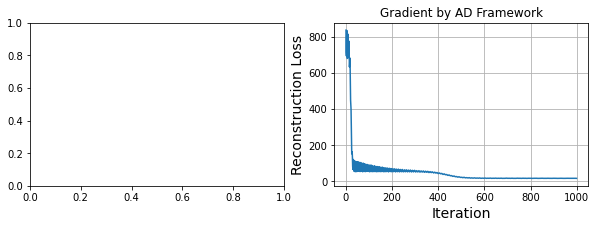

In [7]:
import pandas as pd
import torch.optim as optim

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, encoding="utf-8")

data = torch.tensor(df.iloc[:, [0,1,2,3]].values)
data = data - data.mean(dim=0)

U_random = np.random.rand(data.shape[0], rank)
V_random = np.random.rand(data.shape[1], rank)

# U1,V1,ERROR1 = sgdfactorise(data, rank)
# print (torch.nn.functional.mse_loss(data, U1@V1.t(),reduction='sum'))

U2,V2,ERROR2 = sgdfactorise_torch(data, rank, lr=0.003, numepochs=1000)
print (torch.nn.functional.mse_loss(data, U2@V2.t(),reduction='sum'))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
# ax[0].plot(ERROR1)
# ax[0].grid(True)
# ax[0].set_xlabel("Iteration", fontsize=14)
# ax[0].set_ylabel("Reconstruction Loss", fontsize=14)
# ax[0].set_title("Gradient by Elements",fontsize=12)
ax[1].plot(ERROR2)
ax[1].grid(True)
ax[1].set_xlabel("Iteration", fontsize=14)
ax[1].set_ylabel("Reconstruction Loss", fontsize=14)
ax[1].set_title("Gradient by AD Framework",fontsize=12)

# U2,V2,ERROR3 = sgdfactorise_torch(data, rank)
# L = torch.nn.functional.mse_loss(data, torch.mm(U2, V2.t()), reduction='sum')
# print(L)

# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
# ax[0].plot(ERROR3)
# ax[0].grid(True)
# ax[0].set_xlabel("True Target", fontsize=14)
# ax[0].set_ylabel("Prediction", fontsize=14)
# ax[0].set_title("Prediction of SGD",fontsize=12)
# ax[1].plot(ERROR2)
# ax[1].grid(True)
# ax[1].set_xlabel("Iteration", fontsize=14)
# ax[1].set_ylabel("Error", fontsize=14)
# ax[1].set_title("Error of SGD",fontsize=12)

U3, S3, V3 = torch.svd(data)
S3[2] = 0
S3[3] = 0
input = torch.mm(torch.mm(U3, torch.diag(S3)), V3.t())
L = torch.nn.functional.mse_loss(torch.mm(torch.mm(U3, torch.diag(S3)), V3.t()), data, reduction='sum')
print(L)

torch.Size([150, 4])
torch.Size([150, 2])
torch.Size([4, 2])
torch.Size([150, 4])
tensor([6.2725, 1.5020, 0.0000, 0.0000], dtype=torch.float64)
torch.Size([4, 4])


Text(0.5, 1.0, 'SVD')

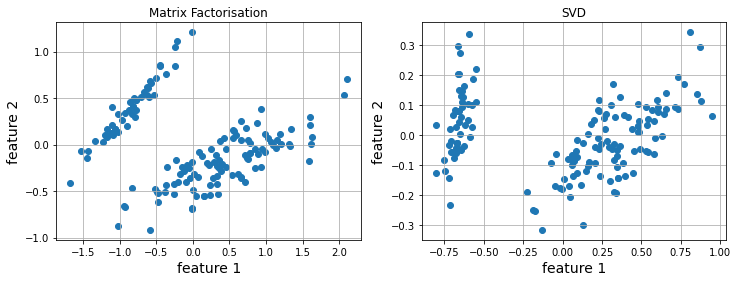

In [25]:
# MD
# print(torch.mm(torch.mm(U3, torch.diag(S3)), V3.t()))
# print(U2@V2.t())
print(data.shape)
print(U2.shape)
print(V2.shape)
MD_axe_1 = A[:,0].detach().numpy()
MD_axe_2 = A[:,1].detach().numpy()
# projection_MD_axe_1 = (data @ MD_axe_1).data.detach().numpy()
# projection_MD_axe_2 = (data @ MD_axe_2).data.detach().numpy()

print(U3.shape)
print(S3)
print(V3.shape)
S3[1] = -S3[1]
projection_PCA = U3 @ torch.diag(S3)
PCA_axe_1 = projection_PCA[:,0].detach().numpy()
PCA_axe_2 = projection_PCA[:,1].detach().numpy()


MD_projection = U2.data.detach().numpy()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].scatter(MD_axe_1, MD_axe_2)
ax[0].grid(True)
ax[0].set_xlabel("feature 1", fontsize=14)
ax[0].set_ylabel("feature 2", fontsize=14)
ax[0].set_title("Matrix Factorisation",fontsize=12)
ax[1].scatter(PCA_axe_1, PCA_axe_2)
ax[1].grid(True)
ax[1].set_xlabel("feature 1", fontsize=14)
ax[1].set_ylabel("feature 2", fontsize=14)
ax[1].set_title("SVD",fontsize=12)

torch.Size([100, 4])
torch.Size([100])
0.18
0.16


Text(0.5, 1.0, 'Test Set')

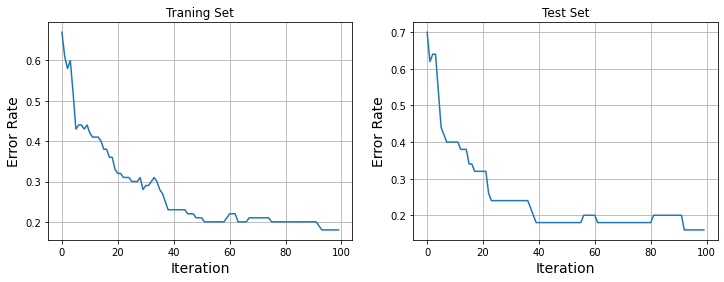

In [ ]:
import pandas as pd
import torch.nn.functional as F

torch.set_default_tensor_type(torch.DoubleTensor)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None) 

df = df.sample(frac=1) #shuffle
# add label indices column
mapping = {k: v for v, k in enumerate(df [4]. unique())} 
df[5] = df[4].map(mapping)
# normalise data
alldata = torch.tensor(df.iloc[:, [0,1,2,3]].values, dtype=torch.float) 
alldata = (alldata - alldata.mean(dim=0)) / alldata.var(dim=0)
# create datasets
targets_tr = torch.tensor(df.iloc[:100, 5].values, dtype=torch.long) 
targets_va = torch.tensor(df.iloc[100:, 5].values, dtype=torch.long)
data_tr = alldata [:100]
data_va = alldata [100:]
print(data_tr.shape)
print(targets_tr.shape)

W1 = torch.tensor(np.random.rand(4, 12), dtype=torch.float, requires_grad=True)
W2 = torch.tensor(np.random.rand(12, 3), dtype=torch.float, requires_grad=True)
b1 = torch.tensor(0., dtype=torch.float, requires_grad=True)
b2 = torch.tensor(0., dtype=torch.float, requires_grad=True)

# logits = torch.relu(data_tr @W1+ b1) @W2+ b2
error_tr = np.zeros(100)
error_va = np.zeros(100)
i = 0
optimizer=optim.SGD([W1, W2, b1, b2],lr=0.01,momentum=0.9)
for n in range(100):
  m = 100 * np.random.rand(30)
  m = m.astype(int)
  input = data_tr[m]
  output = targets_tr[m]
  logits = torch.matmul(torch.relu(torch.matmul(input, W1) + b1), W2) + b2
  logits = logits.view(-1, 3)
  output = output.view(-1)
  loss = torch.nn.functional.cross_entropy(logits, output)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  logits = torch.mm(torch.relu(torch.mm(data_tr, W1) + b1), W2) + b2
  a = F.softmax(logits, dim=1)
  a = a.argmax(dim=1)
  error_tr[n] = np.nonzero(a - targets_tr).shape[0] / targets_tr.shape[0]

  logits = torch.mm(torch.relu(torch.mm(data_va, W1) + b1), W2) + b2
  a = F.softmax(logits, dim=1)
  a = a.argmax(dim=1)
  error_va[n] = np.nonzero(a - targets_va).shape[0] / targets_va.shape[0]

logits = torch.mm(torch.relu(torch.mm(data_tr, W1) + b1), W2) + b2
a = F.softmax(logits, dim=1)
a = a.argmax(dim=1)
print(np.nonzero(a - targets_tr).shape[0] / targets_tr.shape[0])

logits = torch.mm(torch.relu(torch.mm(data_va, W1) + b1), W2) + b2
a = F.softmax(logits, dim=1)
a = a.argmax(dim=1)
print(np.nonzero(a - targets_va).shape[0] / targets_va.shape[0])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].plot(error_tr)
ax[0].grid(True)
ax[0].set_xlabel("Iteration", fontsize=14)
ax[0].set_ylabel("Error Rate", fontsize=14)
ax[0].set_title("Traning Set",fontsize=12)
ax[1].plot(error_va)
ax[1].grid(True)
ax[1].set_xlabel("Iteration", fontsize=14)
ax[1].set_ylabel("Error Rate", fontsize=14)
ax[1].set_title("Test Set",fontsize=12)